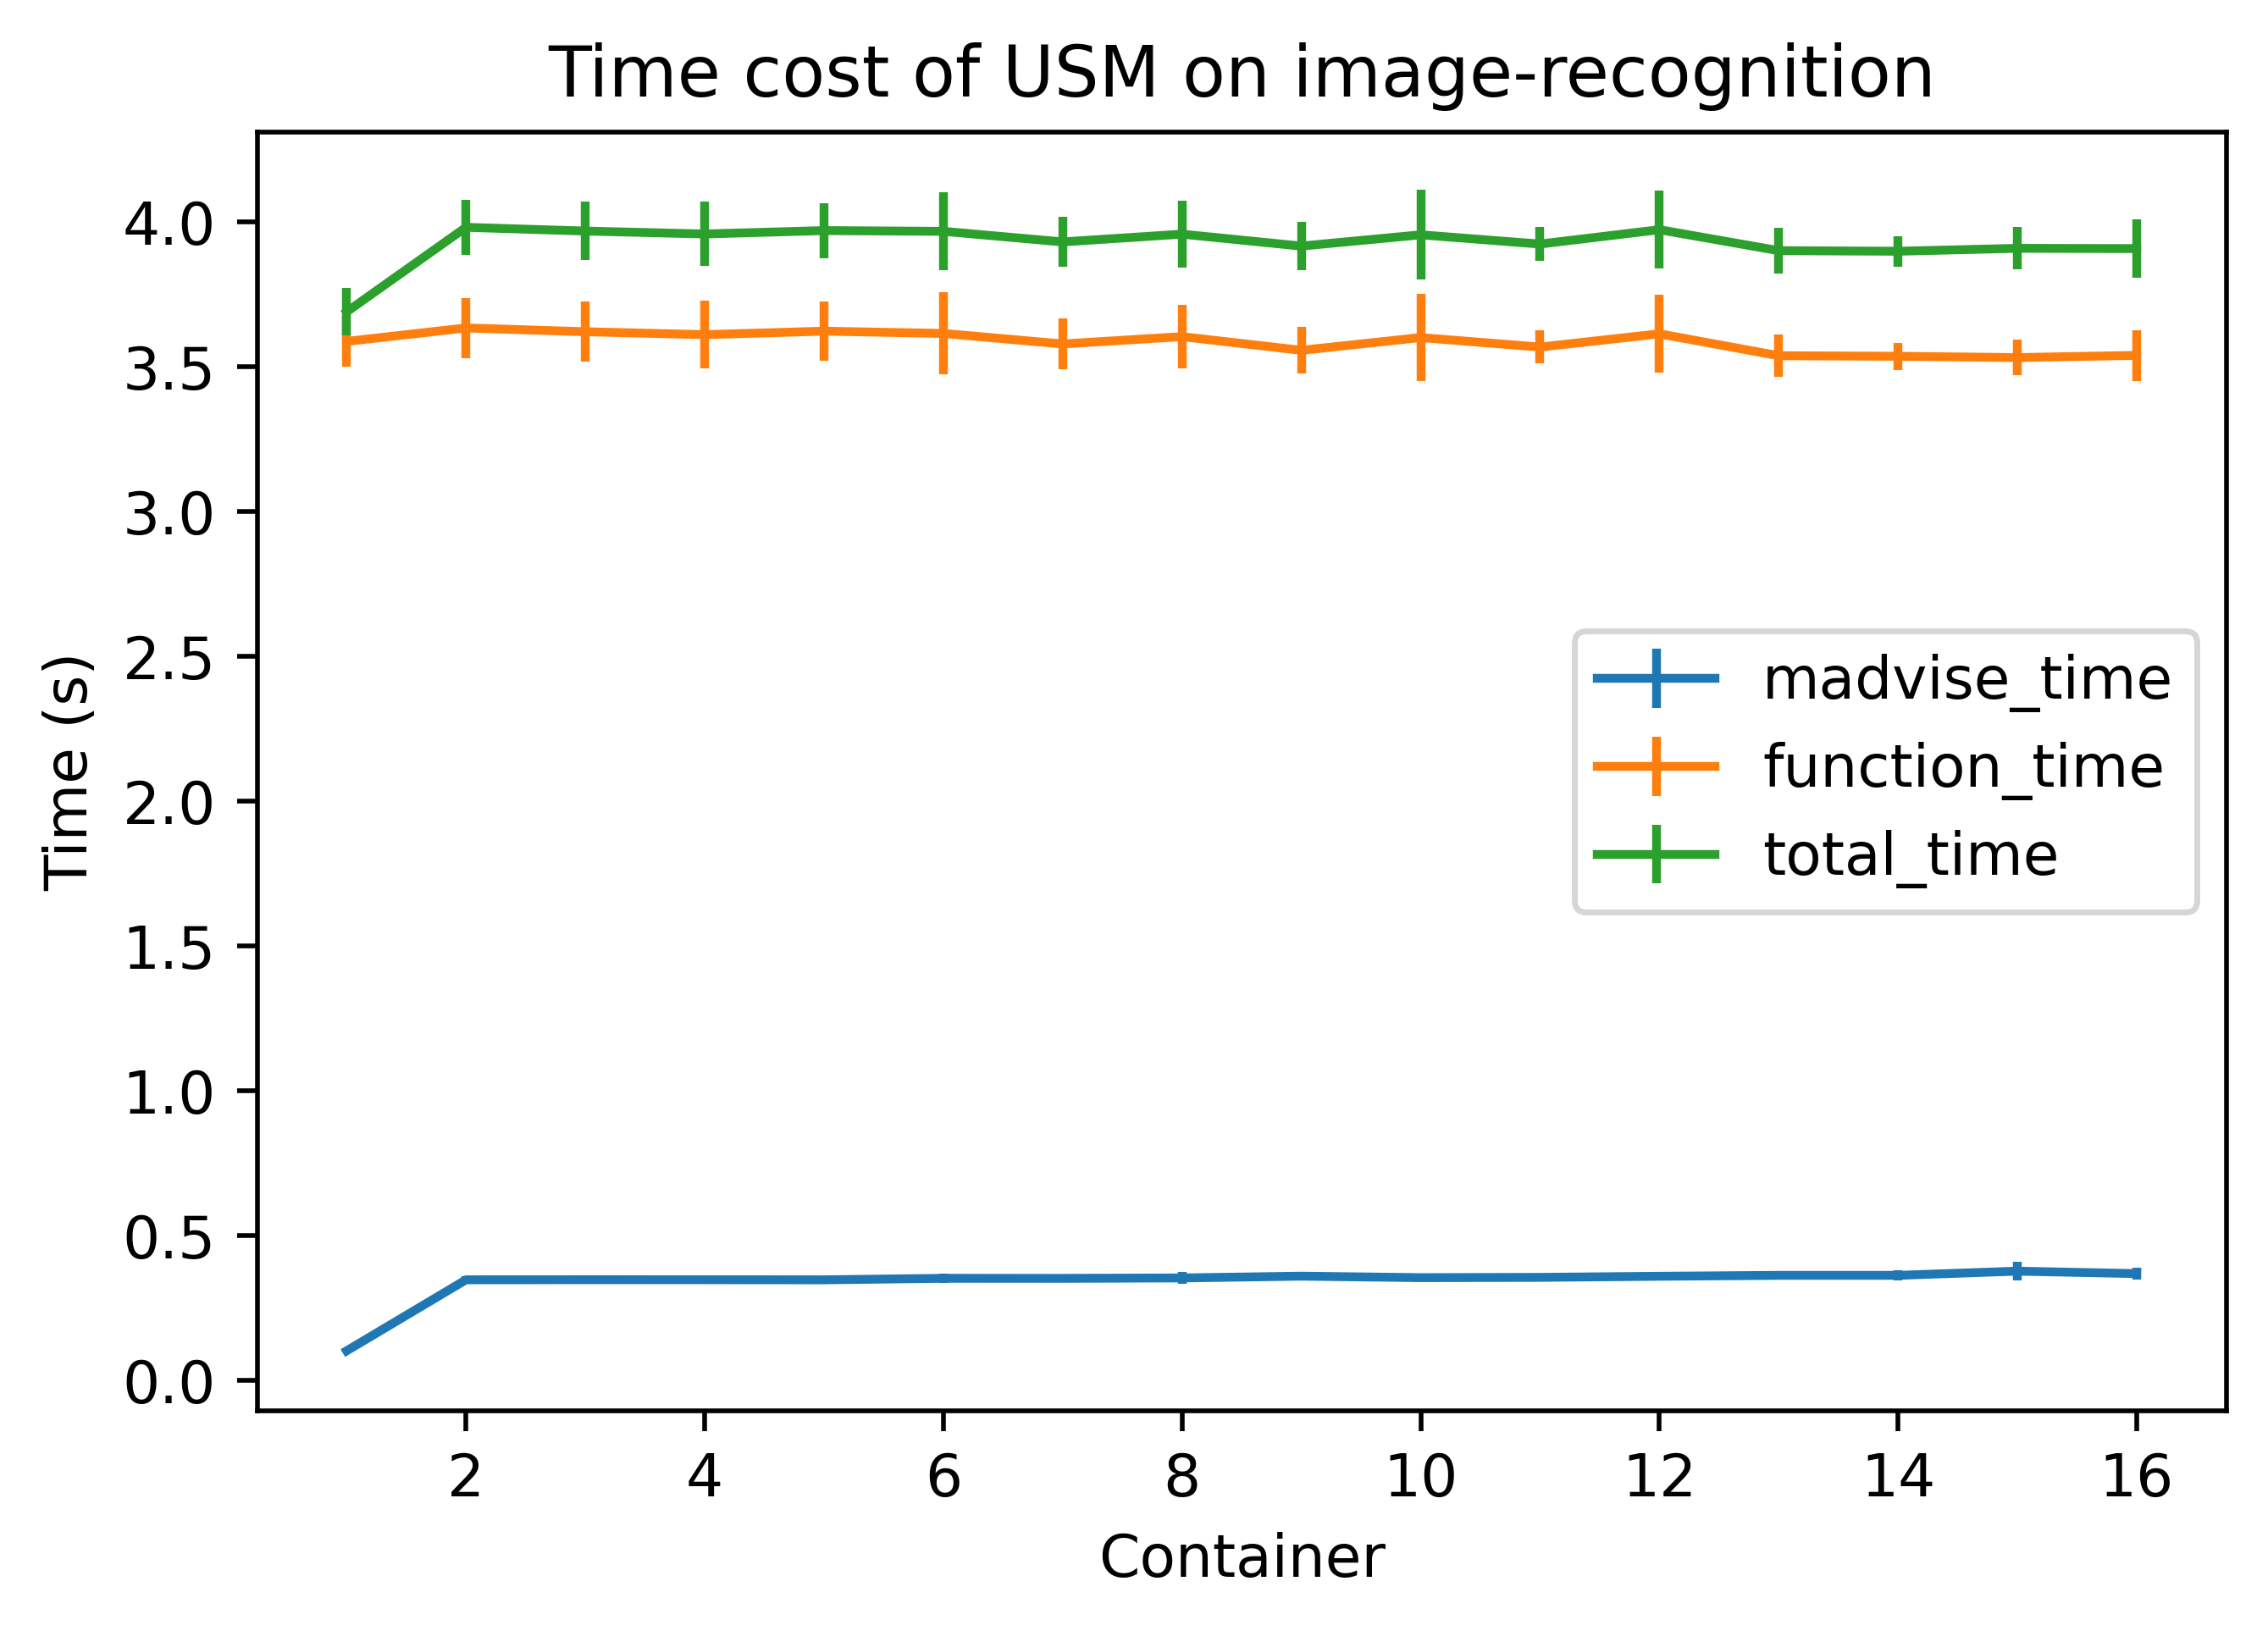

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
#./plot_function_time.py $machine


# machine = sys.argv[1]  # 0 is the current script name
machine = r"einstein_vm"

usm_data_dir = r"C:\Users\facel\usm_plot_data_needed"

# the ith element means the avg and error of the ith container
madvise_time_avg = []
madvise_time_err = []
function_time_avg = []
function_time_err = []
total_time_avg = []
total_time_err = []

x = range(1, 17)
t = 16
c = 10
madvise_time_array = [[0.0 for x in range(c)] for y in range(t)]
function_time_array = [[0.0 for x in range(c)] for y in range(t)]
total_time_array = [[0.0 for x in range(c)] for y in range(t)]

for i in range(1, 11):
    times_dir = "times" + str(i)
    
    for j in range(1, 17):
        container_file = "container" + str(j) + ".json"
        f = open(os.path.join(usm_data_dir, machine, "time_cost", "image-recognition", times_dir, container_file))
        json_data = json.load(f)
        madvise_time = json_data["result"]["output"]["measurement"]["madvise_time"]
        total_time = json_data["result"]["output"]["measurement"]["handler_time"]
        function_time = json_data["result"]["output"]["measurement"]["download_time"] + json_data["result"]["output"]["measurement"]["compute_time"]
        madvise_time_array[j-1][i-1]= (madvise_time)
        function_time_array[j-1][i-1]=(function_time)
        total_time_array[j-1][i-1]=(total_time)
#         print("times:", i, "container:", j, "madvise_time:", madvise_time, "function_time", function_time, "total_time", total_time)

# print(madvise_time_array[1])
for j in range(1, 17):
    madvise_time_avg.append(np.mean(madvise_time_array[j-1]))
    madvise_time_err.append(np.std(madvise_time_array[j-1]))
    function_time_avg.append(np.mean(function_time_array[j-1]))
    function_time_err.append(np.std(function_time_array[j-1]))
    total_time_avg.append(np.mean(total_time_array[j-1]))
    total_time_err.append(np.std(total_time_array[j-1]))

    
madvise_time_avg = pd.Series(madvise_time_avg) / 1000000
madvise_time_err = pd.Series(madvise_time_err) / 1000000
function_time_avg = pd.Series(function_time_avg) / 1000000
function_time_err = pd.Series(function_time_err) / 1000000
total_time_avg = pd.Series(total_time_avg) / 1000000
total_time_err = pd.Series(total_time_err) / 1000000

plt.errorbar(x, madvise_time_avg, madvise_time_err, label='madvise_time')
plt.errorbar(x, function_time_avg, function_time_err, label='function_time')
plt.errorbar(x, total_time_avg, total_time_err, label='total_time')

# plt.rcParams['figure.dpi'] = 500

plt.title("Time cost of USM on image-recognition")
plt.xlabel('Container')
plt.ylabel('Time (s)')
# plt.ylim(ymin=0)
plt.legend()
plt.savefig(os.path.join(usm_data_dir, machine, "pictures", 'function_time.jpg'))

#plt.show()
